In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import scipy.stats 
import pickle
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding = 'unicode_escape') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
len(df)

541909

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:

print("Missing customer ID") 
print() 
print("-" * 40) 
null_sum = df["CustomerID"].isnull().sum()
null_freq = df["CustomerID"].isnull().value_counts(normalize=True)
print(f"There are : {null_sum} missing customer IDs")
print()
print(f"{round(null_freq[True] * 100,2)} % missing customer IDs")
print()
print("Dropping these rows ....") 
drop_idx =df["CustomerID"].isnull().loc[df["CustomerID"].isnull() == True].index
df = df.drop(drop_idx)

Missing customer ID

----------------------------------------
There are : 135080 missing customer IDs

24.93 % missing customer IDs

Dropping these rows ....


In [6]:
#checking .. 
df["CustomerID"].isnull().sum()

0

### Checking for duplicates + Dropping duplicates

In [7]:
drop_idx = df.loc[df.duplicated() == True].index
df = df.drop(drop_idx)
print("Removed duplicates : ") 
print() 
print(f"New length : {len(df)}")

Removed duplicates : 

New length : 401604


## Exploratory analysis

### Country

All Countries : 

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
--------------------------------------------------
Top 10 countries

['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Australia']
--------------------------------------------------


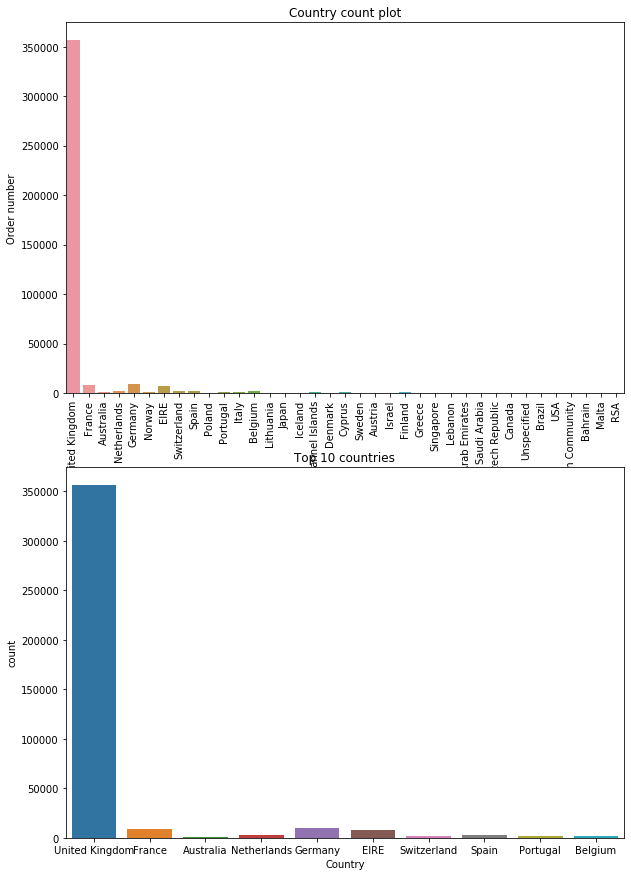

In [8]:
countries = df["Country"].unique()
print("All Countries : ")
print()
print(countries) 
print("-" * 50) 
print("Top 10 countries\n") 
top_10 = df["Country"].value_counts(ascending=False)[:10] 
print(list(top_10.index))
print("-" * 50) 

f, ax = plt.subplots(2,1,figsize=(10,15))
sns.countplot(data=df, x="Country", ax=ax[0])
sns.countplot(data=df[df["Country"].isin(top_10.index)], x="Country", ax=ax[1])
ax[0].set_title("Country count plot")
ax[0].set_ylabel("Order number")
ax[0].set_xticklabels(labels=countries,rotation=90)
ax[1].set_title("Top 10 countries")
plt.show()

### Customer

In [9]:
nb_users = len(df["CustomerID"].value_counts())
print(f"{nb_users} different users order on the website ")

nb_transactions = df["InvoiceNo"].value_counts().count()
print(f"{nb_transactions} different transactions on the website ")

nb_products  = df["StockCode"].value_counts().count()
print(f"{nb_products} products bought ")

4372 different users order on the website 
22190 different transactions on the website 
3684 products bought 


### products / transaction

In [10]:
data = df[["InvoiceNo", "Quantity", "CustomerID"]]
data = data.groupby(["CustomerID", "InvoiceNo"], as_index=False)["Quantity"].count()

### Cancelled orders

In [11]:
cancelled = data["InvoiceNo"].str.contains("C")
cancelled = cancelled.replace(False, 0).astype('int32')
cancelled = cancelled.replace(True, 1).astype('int32')

print("-"*45)
count = cancelled.value_counts()[1]
print(f"Number of cancelled orders : {count}")
print() 
print(f"Frquence of cancelled orders : {round(cancelled.value_counts(normalize=True)[1] * 100,2)} % ")
data

---------------------------------------------
Number of cancelled orders : 3654

Frquence of cancelled orders : 16.47 % 


,CustomerID,InvoiceNo,Quantity
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,50
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


In [12]:
stock_code = df[df["StockCode"].str.contains(r"^[a-zA-Z]+", regex=True)]["StockCode"].unique()
stock_code

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [13]:
df["TotalPrice"] = pd.Series()

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,NaN


In [15]:
df["TotalPrice"] = df["TotalPrice"].fillna(0)
df.loc[(df["Quantity"] > 0), "TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


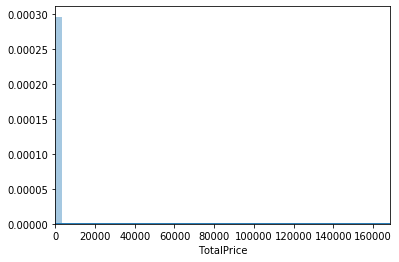

In [17]:
fig, ax = plt.subplots()
g = sns.distplot(df["TotalPrice"], ax=ax)
g.set(xlim=(0, max(df["TotalPrice"])))
plt.show()

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [19]:
def extract_description(column): 
    '''
        return count_keywords : a Serie containing the occurences
                keywords : all the product titles
    '''
    keywords = []
    values = column.unique() 
    count_keywords = {}
    for value in values: 
        keywords.append(value)
        l = value.split(" ")
        for word in l: 
            if word in count_keywords: 
                count_keywords[word] += 1 
            else: 
               count_keywords[word] = 0
    count_keywords = pd.Series(count_keywords).sort_values(ascending=False)
    return set(keywords), count_keywords
    
    

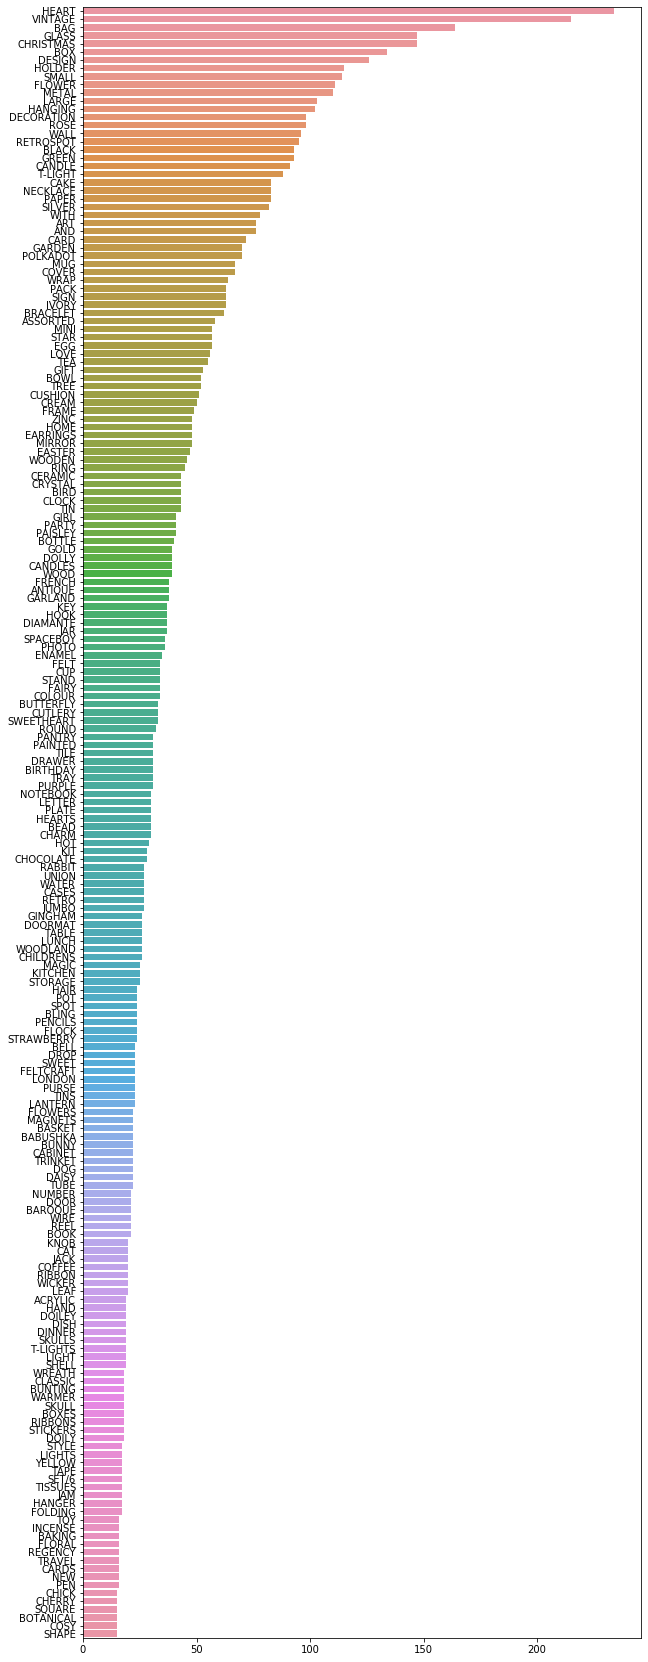

In [20]:
sns.set_context(font_scale=1)
keywords, count_keywords = extract_description(df["Description"])

for word in count_keywords.index: 
    if word in ["PINK", "RED", "WHITE", "SET", "BLUE"]: 
        del count_keywords[word]
    elif len(word) < 3 or word.isnumeric(): 
        del count_keywords[word]
    
plt.figure(figsize=(10,30))
a = sns.barplot(orient="h",y=count_keywords.index[:200],x=count_keywords[:200].values)
plt.show()

In [21]:
#filtering by frequencies 
count_keywords = count_keywords.loc[count_keywords >= 13]
print(f"New size after removals : {len(count_keywords)}")

New size after removals : 239


In [22]:
X = pd.DataFrame(columns=[key for key in count_keywords.index], index=keywords) 
X = X.fillna(0)

In [23]:
for i, product in enumerate(X.index): 
    for word in product.split(" "): 
        if word in X.columns: 
            X[word].iloc[i] = 1


In [24]:
#One hot encoded type
X

,HEART,VINTAGE,BAG,GLASS,CHRISTMAS,BOX,DESIGN,HOLDER,SMALL,FLOWER,...,PICTURE,FONT,JEWELLED,HONEYCOMB,UMBRELLA,FOLKART,GREETING,APRON,DINER,PICNIC
WRAP MAGIC FOREST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASSORTED CAKES FRIDGE MAGNETS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SMALL IVORY HEART WALL ORGANISER,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FOLDING UMBRELLA CREAM POLKADOT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
TOAST ITS - FAIRY FLOWER,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GARDEN METAL SIGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VINTAGE PHOTO ALBUM PARIS DAYS,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CANNISTER VINTAGE LEAF DESIGN,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MINI PAINTED GARDEN DECORATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
ranges = [0,1,2,5,10]

for i in range(len(ranges)): 
    if i == len(ranges) - 1: 
        col_name = f"{ranges[i]}>="
    else: 
        col_name = f"[{ranges[i]},{ranges[i+1]}]"
    X[col_name] = np.zeros(X.shape[0], dtype=int)

In [26]:
print(keywords)
for i, product in enumerate(keywords): 
    price = df[df["Description"] == product]["UnitPrice"].mean() 
    j = 0
    while price >= ranges[j]:
        j += 1 
        if j == len(ranges): 
            break
    if j != len(ranges): 
        X[f"[{ranges[j-1]},{ranges[j]}]"][i] = 1
    else: 
        X["10>="][i] = 1
    

{'WRAP MAGIC FOREST ', 'ASSORTED CAKES FRIDGE MAGNETS', 'SMALL IVORY HEART WALL ORGANISER', 'FOLDING UMBRELLA CREAM POLKADOT', 'TOAST ITS - FAIRY FLOWER', 'COSY SLIPPER SHOES LARGE GREEN', 'CUTE CATS TAPE', '6 RIBBONS RUSTIC CHARM', 'CHARLOTTE BAG VINTAGE ALPHABET ', 'WHITE SAGE INCENSE', '12 MESSAGE CARDS WITH ENVELOPES', 'SET 12 COLOUR PENCILS DOILEY', 'RED ENAMEL FLOWER RING', 'WRAP GREEN PEARS ', 'SILVER GLITTER FLOWER VOTIVE HOLDER', 'SET OF 4 SANTA PLACE SETTINGS', 'SMOKEY GREY COLOUR GLASS', 'GREEN GOOSE FEATHER TREE 60CM', 'DOORMAT KEEP CALM AND COME IN', 'PIZZA PLATE IN BOX', 'RUBY GLASS CLUSTER NECKLACE', 'JAZZ HEARTS PURSE NOTEBOOK', 'LIPSTICK PEN RED', 'BLUE SCANDINAVIAN PAISLEY WRAP', 'SET/3 ROSE CANDLE IN JEWELLED BOX', 'ORANGE/WHT/FUSCHIA STONES NECKLACE', 'TURQ ICE CREAM BUM BAG ', 'FIRE POLISHED GLASS NECKL BRONZE', 'HEART WOODEN CHRISTMAS DECORATION', 'GLASS CHALICE GREEN  SMALL ', 'TRANQUILITY MASALA INCENSE', 'WRAP BIRD GARDEN ', 'RUSTIC STRAWBERRY JAMPOT LARGE ', '

C:\Users\valentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\valentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [27]:
#Print number of product by range 

for i in range(len(ranges)): 
    print()
    if i < len(ranges) - 1:       
        count = X[f"[{ranges[i]},{ranges[i+1]}]"].sum()
        print(f"Range : [{ranges[i]},{ranges[i+1]}] ---> count : {count}")
    else: 
        count = X[f"{ranges[i]}>="].sum()
        print(f"Range : {ranges[i]} >= ---> count : {count}")
    
    
    print("-"*60)



Range : [0,1] ---> count : 962
------------------------------------------------------------

Range : [1,2] ---> count : 1016
------------------------------------------------------------

Range : [2,5] ---> count : 1285
------------------------------------------------------------

Range : [5,10] ---> count : 476
------------------------------------------------------------

Range : 10 >= ---> count : 157
------------------------------------------------------------


In [28]:
X_mat = X.values
X_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Clusturing : Kmean

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from wordcloud import WordCloud
from sklearn.decomposition import PCA


In [30]:

for i in range(3,15):    
    kmeans = KMeans(n_clusters=i, init="k-means++", verbose=0, n_init=25)
    kmeans.fit(X_mat)
    predictions = kmeans.predict(X_mat)
    sil_score = silhouette_score(X_mat, predictions) 
    print(f"Silhouette score for {i} clusters is : {sil_score}")
    print() 
    print("-"*50)

Silhouette score for 3 clusters is : 0.13805960462333774

--------------------------------------------------
Silhouette score for 4 clusters is : 0.16398496257431

--------------------------------------------------
Silhouette score for 5 clusters is : 0.13391561228250248

--------------------------------------------------
Silhouette score for 6 clusters is : 0.1325923908775607

--------------------------------------------------
Silhouette score for 7 clusters is : 0.1494251959051086

--------------------------------------------------
Silhouette score for 8 clusters is : 0.1261748012463637

--------------------------------------------------
Silhouette score for 9 clusters is : 0.1276152735628096

--------------------------------------------------
Silhouette score for 10 clusters is : 0.09215178645070916

--------------------------------------------------
Silhouette score for 11 clusters is : 0.08238743921585392

--------------------------------------------------
Silhouette score for 12 

Silhouette score for 4 clusters is : 0.16398496257431

[0.19032708 0.18409296 0.14086125 ... 0.13705087 0.13801995 0.13106471]
[0 0 1 ... 2 0 2]
--------------------------------------------------
Silhouette score for 5 clusters is : 0.15725655982904962

[0.18175265 0.17651687 0.07209337 ... 0.14359138 0.13276492 0.14074413]
[2 2 3 ... 0 2 0]
--------------------------------------------------
Silhouette score for 6 clusters is : 0.14822321567121732

[0.13143378 0.13251549 0.12675922 ... 0.13117721 0.02228236 0.13421281]
[3 3 5 ... 0 1 0]
--------------------------------------------------


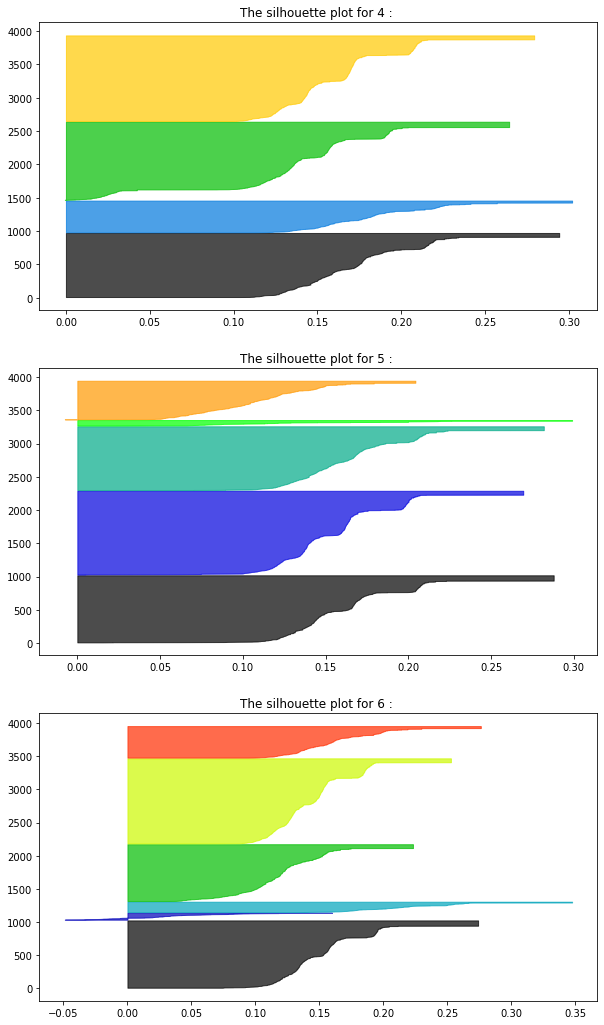

In [31]:
n_clusters = [4,5,6] 

f, ax = plt.subplots(3,1, figsize=(10,18))

cluster_report = {}

for n_cluster in n_clusters: 
    cluster_idx = n_clusters.index(n_cluster)
    kmeans = KMeans(n_clusters=n_cluster, init="k-means++", verbose=0, n_init=25)
    kmeans.fit(X_mat)
    #telling in which cluster samples are 
    predictions = kmeans.predict(X_mat)
    cluster_report[n_cluster] = predictions
    sil_score = silhouette_score(X_mat, predictions) 
    print(f"Silhouette score for {n_cluster} clusters is : {sil_score}")
    print() 
    #silhouette coefficient by sample 
    silhouette_samples_values = silhouette_samples(X_mat, predictions)
    print(silhouette_samples_values)
    print(predictions)
    print("-"*50)
    y_lower = 10
    for i in range(n_cluster):  
        #sort each sample 
        i_th_cluster_sil_score = silhouette_samples_values[predictions == i]
        i_th_cluster_sil_score.sort() 
        i_th_cluster_size = i_th_cluster_sil_score.shape[0]
        color = cm.nipy_spectral(float(i) / n_cluster)
        y_upper = y_lower + i_th_cluster_size
        ax[cluster_idx].fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_th_cluster_sil_score,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax[cluster_idx].set_title(f"The silhouette plot for {n_cluster} : ")
        y_lower = y_upper + 10
    

## World Cloud 

In [32]:
#utility function 
def unpack_count(l): 
    ''' return a dictionnary containing the occurences of each word in a list of products'''
    d = {} 
    for product in l: 
        product = product.split(" ")
        for item in product: 
            if item in d: 
                d[item] += 1 
            else: 
                d[item] = 0      
    return d

# Change number below if needed

In [33]:
n_cluster = 4
predictions = cluster_report[n_cluster]
word_clust = [dict() for i in range(n_cluster)]

for i in range(n_cluster): 
    i_th_clust = list(X[predictions == i].index)
    i_th_clust_occurencies = unpack_count(i_th_clust)
    #unpacking the list 
    for product in i_th_clust: 
        s = product.split(" ") 
        for word in s: 
            #count word in list 
            if word in ["", "+", "&"] or word.isnumeric(): 
                break
            #add 
            word_clust[i][word] = i_th_clust_occurencies[word]
    


In [34]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None): 
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

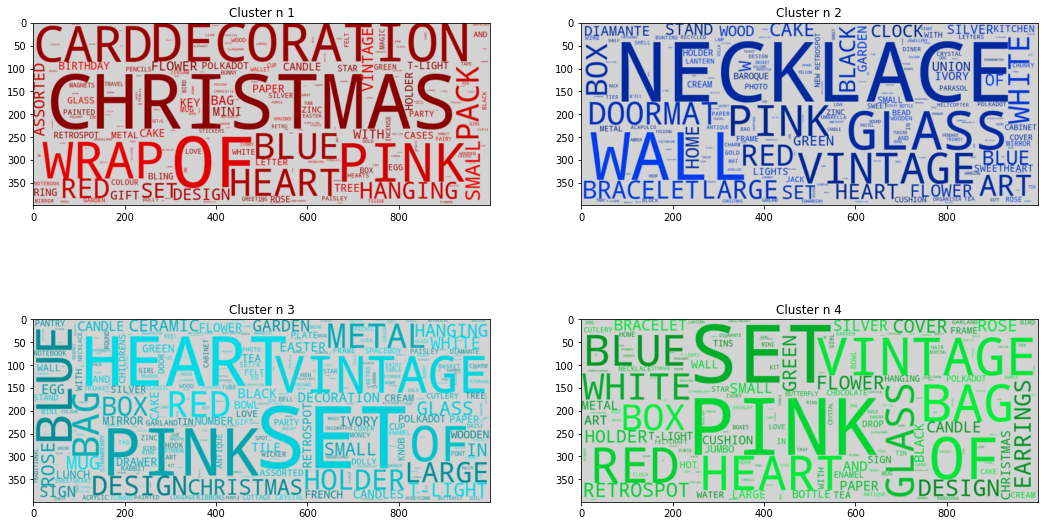

In [35]:
f, ax = plt.subplots(2,2, figsize=(18,10))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
wordclouds = []

for i in range(n_cluster): 
    tone = color[i]
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
    wordcloud.generate_from_frequencies(word_clust[i])
    wordclouds.append(wordcloud)

    
ax[0][0].set_title("Cluster n 1")
ax[0][0].imshow(wordclouds[0], interpolation="bilinear")

ax[0][1].set_title("Cluster n 2") 
ax[0][1].imshow(wordclouds[1], interpolation="bilinear")


ax[1][0].set_title("Cluster n 3") 
ax[1][0].imshow(wordclouds[2], interpolation="bilinear")


ax[1][1].set_title("Cluster n 4") 
ax[1][1].imshow(wordclouds[3], interpolation="bilinear")


In [45]:
pca = PCA().fit(X_mat)
print(f"Dimensions of X_mat before PCA : {X_mat.shape}")
X_pca = pca.transform(X_mat)
print(f"Dimensions of X_mat after PCA : {X_pca.shape}")

Dimensions of X_mat before PCA : (3896, 244)
Dimensions of X_mat after PCA : (3896, 244)


### Plotting PCA variance 

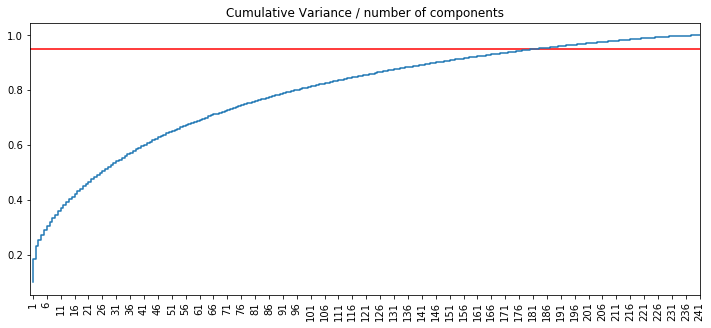

In [77]:
plt.figure(figsize=(12,5))

x = np.arange(1,245).reshape(-1,1)
y = np.cumsum(pca.explained_variance_ratio_).reshape(-1,1)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title("Cumulative Variance / number of components")
plt.xlim(0, 200)
plt.step(x, y)
plt.xticks(np.arange(1,245,5), rotation=90)
plt.show()

In [89]:
# We only keep 50 components for visualization purposes 

new_X_pca = PCA(n_components=50).fit_transform(X_mat)
mat = pd.DataFrame(new_X_pca)
mat["cluster"] = predictions
mat

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,cluster
0,-0.443455,0.788917,-0.195942,-0.083551,-0.073946,-0.031219,-0.037661,-0.008817,-0.081008,0.020711,...,-0.070339,-0.058989,-0.124943,-0.048450,-0.117452,-0.038700,0.019428,-0.027738,-0.176770,0
1,-0.431157,0.760001,-0.194102,-0.052472,-0.113344,-0.028288,-0.017737,-0.013116,-0.090362,0.058074,...,-0.009825,-0.342152,0.452545,-0.076309,-0.219684,0.315544,-0.026734,0.240342,-0.086150,0
2,-0.129687,0.002979,1.012783,0.915623,0.398862,0.024332,-0.438279,0.225516,-0.209432,-0.038085,...,0.081662,0.195431,-0.247481,0.066868,-0.283877,-0.083059,-0.130915,0.004699,-0.048352,1
3,0.764937,-0.031641,-0.095966,-0.039483,-0.106144,0.035407,-0.044512,-0.018484,-0.049005,-0.008956,...,-0.280447,0.070340,0.291891,-0.038363,0.002962,0.037352,0.369362,0.175799,-0.418328,3
4,-0.494705,-0.653132,-0.166785,-0.041835,-0.181932,-0.043268,-0.021037,-0.008128,-0.155457,-0.089530,...,-0.060424,0.101393,-0.056854,-0.090210,-0.031318,0.022204,-0.164132,-0.005236,-0.077111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,-0.517931,-0.703860,-0.190489,-0.035411,-0.299091,0.049473,-0.195071,-0.228689,0.626457,1.022754,...,0.074617,0.028744,-0.019055,0.015339,-0.067807,0.034534,0.001662,0.028301,0.080759,2
3892,-0.103416,0.003926,0.988308,-0.391801,0.709599,-0.128532,-0.033442,-0.293940,-0.216155,0.200236,...,-0.197283,0.103084,-0.159116,0.063652,0.003294,0.068680,-0.095851,0.077454,-0.060518,1
3893,-0.489713,-0.684243,-0.185394,-0.569620,0.685188,-0.086519,-0.056146,-0.047756,-0.428014,0.165680,...,-0.107399,0.059961,0.177601,-0.001421,-0.066243,-0.042837,-0.111741,-0.056710,-0.048465,2
3894,-0.463363,0.781627,-0.218065,0.090917,-0.072301,0.025461,-0.134304,-0.082361,0.094184,0.009001,...,0.079647,0.066678,0.057964,0.012376,-0.185316,-0.306200,0.222600,-0.058083,0.436161,0


using PCA 0
using PCA 1
using PCA 2
using PCA 3


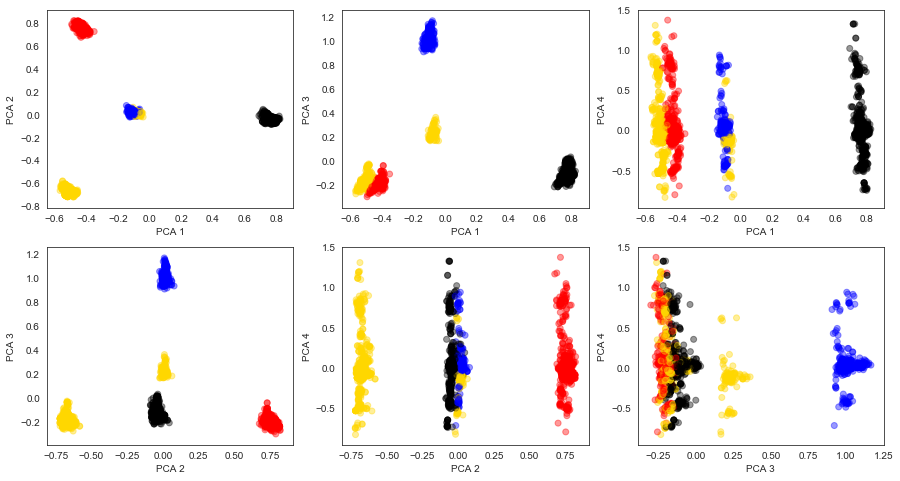

In [113]:
sns.set_style("white")

cmap = {0: "r", 1 : "b", 2 : "gold", 3 : "k"}
label_color = [cmap[i] for i in mat["cluster"]]
fig = plt.figure(figsize=(15,8))
increment = 0 

for ix in range(4): 
    print("using PCA", ix)
    for iy in range(ix+1, 4): 
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c=label_color, alpha=0.4)
        ax.set_ylabel(f"PCA {iy + 1}")
        ax.set_xlabel(f"PCA {ix + 1}")
        if increment == 9: 
            break
    if increment == 9: 
        break

plt.show()
        


In [140]:
products_categories = dict() 
for i in range(n_cluster): 
    print(f"sorting cluster {i + 1}")
    products = list(X[predictions == i].index)
    for item in products: 
        products_categories[item] = i

sorting cluster 1
WRAP MAGIC FOREST  is in 0
ASSORTED CAKES FRIDGE MAGNETS is in 0
CUTE CATS TAPE is in 0
CHARLOTTE BAG VINTAGE ALPHABET  is in 0
WHITE SAGE INCENSE is in 0
SET 12 COLOUR PENCILS DOILEY is in 0
WRAP GREEN PEARS  is in 0
SILVER GLITTER FLOWER VOTIVE HOLDER is in 0
SMOKEY GREY COLOUR GLASS is in 0
JAZZ HEARTS PURSE NOTEBOOK is in 0
LIPSTICK PEN RED is in 0
BLUE SCANDINAVIAN PAISLEY WRAP is in 0
HEART WOODEN CHRISTMAS DECORATION is in 0
TRANQUILITY MASALA INCENSE is in 0
WRAP BIRD GARDEN  is in 0
TOILET SIGN OCCUPIED OR VACANT is in 0
PACK OF 60 SPACEBOY CAKE CASES is in 0
HERB MARKER CHIVES  is in 0
YELLOW BREAKFAST CUP AND SAUCER is in 0
REX CASH+CARRY JUMBO SHOPPER is in 0
GLASS HEART T-LIGHT HOLDER  is in 0
SET 12 RETRO WHITE CHALK STICKS is in 0
STAR WOODEN CHRISTMAS DECORATION is in 0
MOROCCAN TEA GLASS is in 0
NOEL GARLAND PAINTED ZINC  is in 0
MAGIC DRAWING SLATE CIRCUS PARADE   is in 0
HOLLY TOP CHRISTMAS STOCKING is in 0
HANGING HEART WITH BELL is in 0
TUMBLER BA

RED RETROSPOT PLATE  is in 2
CAMOUFLAGE LED TORCH is in 2
DANISH ROSE BEDSIDE CABINET is in 2
RED ROCKING HORSE HAND PAINTED is in 2
BLACKCHRISTMAS TREE 30CM is in 2
SET/6 EAU DE NIL BIRD T-LIGHTS is in 2
LOVE LARGE WOOD LETTERS  is in 2
36 PENCILS TUBE POSY is in 2
TURQUOISE BERTIE GLASS BEAD CHARM is in 2
3 BIRDS CANVAS SCREEN is in 2
KEY RING BASEBALL BOOT ASSORTED  is in 2
WATERING CAN GARDEN MARKER is in 2
ROSE FOLKART HEART DECORATIONS is in 2
IF YOU CAN'T STAND THE HEAT MUG is in 2
3 HOOK HANGER MAGIC GARDEN is in 2
ZINC HEART FLOWER T-LIGHT HOLDER is in 2
CROCHET DOG KEYRING is in 2
VICTORIAN GLASS HANGING T-LIGHT is in 2
FAUX FUR CHOCOLATE THROW is in 2
CHILDRENS SPACEBOY MUG is in 2
ORIGAMI LAVENDER INCENSE/CANDL SET  is in 2
FRENCH BLUE METAL DOOR SIGN No is in 2
RETRO PINK BALL ASHTRAY  is in 2
LUNCH BAG SUKI DESIGN  is in 2
WHITE BAROQUE WALL CLOCK  is in 2
RED GINGHAM ROSE JEWELLERY BOX is in 2
PEARL CRYSTAL PUMPKIN T-LIGHT HLDR is in 2
SET OF 2 CERAMIC CHRISTMAS TREES is

In [143]:
df["category"] = df["Description"].map(products_categories)

In [157]:
#Adding the amount spent 

for i in range(n_cluster): 
    col_name = f"categ_{i}" 
    df_temp = df[df["category"] == i ] 
    price = df_temp["TotalPrice"]
    #adding price
    df[col_name] = price
    #fixing negative 
    df[col_name].apply(lambda x : x if x > 0 else 0)
    #fillna
    df[col_name].fillna(0, inplace=True)

In [163]:
sdf.groupby(["InvoiceNo", "CustomerID"])["TotalPrice"].sum()

InvoiceNo  CustomerID
536365     17850.0       139.12
536366     17850.0        22.20
536367     13047.0       278.73
536368     13047.0        70.05
536369     13047.0        17.85
                          ...  
C581484    16446.0         0.00
C581490    14397.0         0.00
C581499    15498.0         0.00
C581568    15311.0         0.00
C581569    17315.0         0.00
Name: TotalPrice, Length: 22190, dtype: float64

In [164]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,category,categ_0,categ_1,categ_2,categ_3
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,3,0.0,0.0,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,3,0.0,0.0,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,3,0.0,0.0,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,3,0.0,0.0,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,3,0.0,0.0,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,0,10.2,0.0,0.0,0.00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,3,0.0,0.0,0.0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,3,0.0,0.0,0.0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,3,0.0,0.0,0.0,16.60
